<a href="https://colab.research.google.com/github/NicoD920/analisisDatosPrimavera2024/blob/main/Tarea_2_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de paquetes e instalaciones, lod ejamos fuera para ir agregando de ser necesario

In [43]:
if(!require(haven)){install.packages("haven")}
if(!require(skimr)){install.packages("skimr")}
if(!require(dplyr)){install.packages("dplyr")}
if(!require(ggplot2)){install.packages("ggplot2")}

library(haven)
library(readr)
library(skimr)
library(dplyr)
library(ggplot2)

Loading required package: ggplot2



# Configuración general del entorno

Dejamos cargada la data en:
* data_base_diff (csv)
* data_base_vird (csv)
* data_base_vird_dta (dta)

## Entorno de trabajo en R

## Instalación de paquetes e importación

## Carga de datos

In [2]:
base_diff_in_diff <- "https://raw.githubusercontent.com/NicoD920/analisisDatosPrimavera2024/refs/heads/main/Tarea%202/Base%20(Diff%20in%20Diff).csv"
base_vi_rd <- "https://raw.githubusercontent.com/NicoD920/analisisDatosPrimavera2024/refs/heads/main/Tarea%202/Base%20(VI%2C%20RD).csv"
base_vi_rd_dta <- "https://github.com/NicoD920/analisisDatosPrimavera2024/raw/refs/heads/main/Tarea%202/Base%20(VI,%20RD).dta"


## Definición de datas
* data_base_diff (csv)
* data_base_vird (csv)
* data_base_vird_dta (dta)

In [3]:
data_base_diff <- read_csv(base_diff_in_diff)
head(data_base_diff)

New names:
• `` -> `...1`
Rows: 321 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (26): ...1, year, age, agesq, nbh, cbd, intst, lintst, price, rooms, are...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,⋯,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1978,48,2304,4,3000,1000,6.9078,60000,7,⋯,11.00210,0,7.414573,8.429017,0,47.71770,1,0,60000,11.00210
2,1978,83,6889,4,4000,1000,6.9078,40000,6,⋯,10.59663,0,7.867871,9.032409,0,47.71770,1,0,40000,10.59663
3,1978,58,3364,4,4000,1000,6.9078,34000,6,⋯,10.43412,0,7.042286,8.517193,0,47.71770,1,0,34000,10.43412
4,1978,11,121,4,4000,1000,6.9078,63900,5,⋯,11.06507,0,7.035269,9.210340,0,47.71770,1,0,63900,11.06507
5,1978,48,2304,4,4000,2000,7.6009,44000,5,⋯,10.69195,0,7.532624,9.210340,0,57.77368,1,0,44000,10.69195
6,1978,78,6084,4,3000,2000,7.6009,46000,6,⋯,10.73640,0,7.484369,9.159047,0,57.77368,1,0,46000,10.73640


In [4]:
data_base_vird <- read_csv(base_vi_rd)
head(data_base_vird)



Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 30703 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ;nquest;anno;lnc;c;lncn;cn;lnjconsal;jconsal;y;y_real;w;af;pf;ar;ar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


;nquest;anno;lnc;c;lncn;cn;lnjconsal;jconsal;y;y_real;w;af;pf;ar;ar1;famtype;children;children_0_2;children_3_5;children_6_11;children_12_14;children_15_18;ncomp;nperc;sizemun;region;qu_m;qu_f;esse_m;esse_f;elig_m;elig_f;educ_m;educ_f;eta_m;eta_f;valabit;godabit;supab;ancostr;job_m;job_f;lret_m;lret_f;acontrib_m;acontrib_f;n;N;home_owner;pop;rich;filthy_rich;sel;no_f;ed_m1;ed_m2;ed_m3;ed_m4;ed_m5;ed_m6;ed_f1;ed_f2;ed_f3;ed_f4;ed_f5;ed_f6;ed_f7;yob_m;yob_f;coh_m;coh_f;co_m1;co_m2;co_m3;co_m4;co_m5;co_m6;co_m7;co_m8;co_m9;co_m10;co_m11;co_m12;co_m13;co_f1;co_f2;co_f3;co_f4;co_f5;co_f6;co_f7;co_f8;co_f9;co_f10;co_f11;co_f12;co_f13;co_f14;sup2;w_fit;da1;da2;da3;da4;da5;da6;mda1;m1;mda2;m2;mda3;m3;mda4;m4;mda5;m5;mda6;m6;af_fit;af_rich;af_poor;w_rich;w_poor;w_terz;w_poor33;left;left_decoded;decoded_famtype;decoded_sizemun;decoded_region;decoded_qu_m;decoded_qu_f;decoded_elig_m;decoded_elig_f;decoded_educ_m;decoded_educ_f;decoded_godabit;decoded_job_m;decoded_job_f;decoded_lret_m;decoded_lret_f;decoded_left
<chr>
"1;25;1993;9,93779468536377;20698,0431448094;9,93779468536377;20698,0431448094;6,33774614334106;565,520304502988;38066,9580228209;41683,31640625;365522,305405847;43175,7318391438;8482,80456754482;330829,378134248;322346,573566703;1;0;0;0;0;0;0;6;2;2;4;0;0;-17;-20;0;0;4;4;41;39;226208,121801195;1;140;980;2;2;NA;NA;18;15;1;2;1;0;1;1;0;0;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;1952;1954;10;10;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;19600;NA;0;0;0;0;0;0;NA;0,0882294774055481;NA;0,157467857003212;NA;0,164193868637085;NA;0,193471804261208;NA;0,193273991346359;NA;0,203363001346588;NA;1;0;1;0;NA;0;1;kept;couple;between 20000 and 40000 residents;South;worker;worker;non eligible;non eligible;vocational studies;vocational studies;owner;publ empl;publ empl;"";"";kept"
"2;25;1995;10,3479804992676;31193,996705005;10,1669826507568;26029,4277141101;6,83477830886841;929,622418361076;47497,7137819233;47497,71484375;385567,708519469;62782,1465885401;23240,5604590269;346026,122389956;335696,984408166;1;0;0;0;0;0;0;5;2;2;4;0;0;-15;-18;0;0;5;5;43;41;258228,449544743;1;130;1986;2;2;NA;NA;20;17;2;2;1;0;1;1;0;0;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;1952;1954;10;10;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;16900;NA;0;0;0;0;0;0;NA;0,0882294774055481;NA;0,157467857003212;NA;0,164193868637085;NA;0,193471804261208;NA;0,193273991346359;NA;0,203363001346588;NA;1;0;1;0;NA;0;1;kept;couple;between 20000 and 40000 residents;South;worker;worker;non eligible;non eligible;upper secondary;upper secondary;owner;publ empl;publ empl;"";"";kept"
"3;34;1993;10,4320907592773;33931,2182701793;10,4320907592773;33931,2182701793;6,74321126937866;848,280456754482;57677,2151491787;63156,55078125;406710,840390086;96567,9111713653;0;310142,929218721;288415,355296524;1;1;0;0;0;0;0;4;2;2;2;1;0;7;15;1;1;6;5;50;49;180966,497440956;1;84;946;NA;2;2;NA;25;30;1;6;1;0;0;0;1;0;0;0;0;0;0;1;0;0;0;0;0;1;0;1943;1944;8;8;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;7056;296058,28125;0;0;0;0;0;0;NA;0,0882294774055481;NA;0,157467857003212;NA;0,164193868637085;NA;0,193471804261208;NA;0,193273991346359;NA;0,203363001346588;59420,609375;1;0;1;0;3;0;1;kept;couple;between 20000 and 40000 residents;North-east;retired;worker;eligible;eligible;college or higher;upper secondary;owner;"";publ empl;publ empl;"";kept"
"4;34;1995;10,8913831710815;53711,5175053066;10,6778087615967;43382,3795235169;6,65245676040649;774,68534863423;62045,7442753101;62045,74609375;441570,648721511;0;30987,4139453692;472558,06266688;464811,209180538;1;1;0;0;0;0;0;4;2;2;2;1;0;9;17;1;1;6;6;52;51;464811,209180538;1;130;1928;NA;2;2;NA;25;32;2;6;1;0;1;1;1;0;0;0;0;0;0;1;0;0;0;0;0;0;1;1943;1944;8;8;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;16900;434059,4375;0;0;0;0;0;0;NA;0,0882294774055481;NA;0,157467857003212;NA;0,164193868637085;NA;0,193471804261208;NA;0,193273991346359;NA;0,203363001346588;69620,25;1;0;1;0;3;0;1;kept;couple;between

In [5]:
data_base_vird_dta <- read_dta(base_vi_rd_dta)
head(data_base_vird_dta)

nquest,anno,lnc,c,lncn,cn,lnjconsal,jconsal,y,y_real,⋯,decoded_elig_m,decoded_elig_f,decoded_educ_m,decoded_educ_f,decoded_godabit,decoded_job_m,decoded_job_f,decoded_lret_m,decoded_lret_f,decoded_left
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
25,1993,9.937795,20698.04,9.937795,20698.04,6.337746,565.5203,38066.96,41683.32,⋯,non eligible,non eligible,vocational studies,vocational studies,owner,publ empl,publ empl,,,kept
25,1995,10.347980,31194.00,10.166983,26029.43,6.834778,929.6224,47497.71,47497.71,⋯,non eligible,non eligible,upper secondary,upper secondary,owner,publ empl,publ empl,,,kept
34,1993,10.432091,33931.22,10.432091,33931.22,6.743211,848.2805,57677.22,63156.55,⋯,eligible,eligible,college or higher,upper secondary,owner,,publ empl,publ empl,,kept
34,1995,10.891383,53711.52,10.677809,43382.38,6.652457,774.6853,62045.74,62045.75,⋯,eligible,eligible,college or higher,college or higher,owner,,publ empl,publ empl,,kept
34,1998,11.315439,82079.15,11.184411,71999.26,7.426539,1679.9826,79761.60,74130.43,⋯,non eligible,eligible,college or higher,college or higher,owner,SE,publ empl,,,kept
34,2000,11.015616,60816.52,10.757788,46994.58,7.519109,1842.9248,79347.92,70786.28,⋯,eligible,eligible,college or higher,college or higher,owner,publ empl,publ empl,,,kept


In [ ]:

# skim(data_base_diff)
# kim(data_base_vird)
# skim(data_base_vird_dta)
# summary(data_base_diff)
# summary(data_base_vird)
# summary(data_base_vird_dta)
# str(data_base_diff)
# str(data_base_vird)
# str(data_base_vird_dta)

# Mirada Inicial EDA

## data_base_diff

In [8]:
head(data_base_diff)


...1,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,⋯,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1978,48,2304,4,3000,1000,6.9078,60000,7,⋯,11.00210,0,7.414573,8.429017,0,47.71770,1,0,60000,11.00210
2,1978,83,6889,4,4000,1000,6.9078,40000,6,⋯,10.59663,0,7.867871,9.032409,0,47.71770,1,0,40000,10.59663
3,1978,58,3364,4,4000,1000,6.9078,34000,6,⋯,10.43412,0,7.042286,8.517193,0,47.71770,1,0,34000,10.43412
4,1978,11,121,4,4000,1000,6.9078,63900,5,⋯,11.06507,0,7.035269,9.210340,0,47.71770,1,0,63900,11.06507
5,1978,48,2304,4,4000,2000,7.6009,44000,5,⋯,10.69195,0,7.532624,9.210340,0,57.77368,1,0,44000,10.69195
6,1978,78,6084,4,3000,2000,7.6009,46000,6,⋯,10.73640,0,7.484369,9.159047,0,57.77368,1,0,46000,10.73640


In [9]:
str(data_base_diff)

spc_tbl_ [321 × 26] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1    : num [1:321] 1 2 3 4 5 6 7 8 9 10 ...
 $ year    : num [1:321] 1978 1978 1978 1978 1978 ...
 $ age     : num [1:321] 48 83 58 11 48 78 22 78 42 41 ...
 $ agesq   : num [1:321] 2304 6889 3364 121 2304 ...
 $ nbh     : num [1:321] 4 4 4 4 4 4 4 4 4 4 ...
 $ cbd     : num [1:321] 3000 4000 4000 4000 4000 3000 4000 3000 3000 3000 ...
 $ intst   : num [1:321] 1000 1000 1000 1000 2000 2000 2000 2000 2000 2000 ...
 $ lintst  : num [1:321] 6.91 6.91 6.91 6.91 7.6 ...
 $ price   : num [1:321] 60000 40000 34000 63900 44000 46000 56000 38500 60500 55000 ...
 $ rooms   : num [1:321] 7 6 6 5 5 6 6 6 8 5 ...
 $ area    : num [1:321] 1660 2612 1144 1136 1868 ...
 $ land    : num [1:321] 4578 8370 5000 10000 10000 ...
 $ baths   : num [1:321] 1 2 1 1 1 3 2 2 2 2 ...
 $ dist    : num [1:321] 10700 11000 11500 11900 12100 10000 11700 10200 10500 11000 ...
 $ ldist   : num [1:321] 9.28 9.31 9.35 9.38 9.4 ...
 $ wind    : num [1:321] 

In [11]:
summary(data_base_diff)

      ...1          year           age             agesq            nbh       
 Min.   :  1   Min.   :1978   Min.   :  0.00   Min.   :    0   Min.   :0.000  
 1st Qu.: 81   1st Qu.:1978   1st Qu.:  0.00   1st Qu.:    0   1st Qu.:0.000  
 Median :161   Median :1978   Median :  4.00   Median :   16   Median :2.000  
 Mean   :161   Mean   :1979   Mean   : 18.01   Mean   : 1382   Mean   :2.209  
 3rd Qu.:241   3rd Qu.:1981   3rd Qu.: 22.00   3rd Qu.:  484   3rd Qu.:4.000  
 Max.   :321   Max.   :1981   Max.   :189.00   Max.   :35721   Max.   :6.000  
      cbd            intst           lintst           price       
 Min.   : 1000   Min.   : 1000   Min.   : 6.908   Min.   : 26000  
 1st Qu.: 9000   1st Qu.: 9000   1st Qu.: 9.105   1st Qu.: 65000  
 Median :14000   Median :16000   Median : 9.680   Median : 85900  
 Mean   :15822   Mean   :16442   Mean   : 9.481   Mean   : 96101  
 3rd Qu.:23000   3rd Qu.:24000   3rd Qu.:10.086   3rd Qu.:120000  
 Max.   :35000   Max.   :34000   Max.   :10.4

In [22]:
# Calcular valores faltantes por columna
missing_values_diff <- colSums(is.na(data_base_diff))

# Convertir a data frame para mejor visualización
missing_df_diff <- data.frame(
  Column = names(missing_values_diff),
  MissingCount = missing_values_diff
)

# Ordenar de mayor a menor cantidad de valores faltantes
missing_df_diff<- missing_df_diff[order(-missing_df_diff$MissingCount), ]

# Mostrar las primeras filas del resumen
head(missing_df_diff)


,Column,MissingCount
,<chr>,<dbl>
...1,...1,0
year,year,0
age,age,0
agesq,agesq,0
nbh,nbh,0
cbd,cbd,0


## data_base_vird

In [14]:
head(data_base_vird_dta)

nquest,anno,lnc,c,lncn,cn,lnjconsal,jconsal,y,y_real,⋯,decoded_elig_m,decoded_elig_f,decoded_educ_m,decoded_educ_f,decoded_godabit,decoded_job_m,decoded_job_f,decoded_lret_m,decoded_lret_f,decoded_left
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
25,1993,9.937795,20698.04,9.937795,20698.04,6.337746,565.5203,38066.96,41683.32,⋯,non eligible,non eligible,vocational studies,vocational studies,owner,publ empl,publ empl,,,kept
25,1995,10.347980,31194.00,10.166983,26029.43,6.834778,929.6224,47497.71,47497.71,⋯,non eligible,non eligible,upper secondary,upper secondary,owner,publ empl,publ empl,,,kept
34,1993,10.432091,33931.22,10.432091,33931.22,6.743211,848.2805,57677.22,63156.55,⋯,eligible,eligible,college or higher,upper secondary,owner,,publ empl,publ empl,,kept
34,1995,10.891383,53711.52,10.677809,43382.38,6.652457,774.6853,62045.74,62045.75,⋯,eligible,eligible,college or higher,college or higher,owner,,publ empl,publ empl,,kept
34,1998,11.315439,82079.15,11.184411,71999.26,7.426539,1679.9826,79761.60,74130.43,⋯,non eligible,eligible,college or higher,college or higher,owner,SE,publ empl,,,kept
34,2000,11.015616,60816.52,10.757788,46994.58,7.519109,1842.9248,79347.92,70786.28,⋯,eligible,eligible,college or higher,college or higher,owner,publ empl,publ empl,,,kept


In [17]:
str(data_base_vird_dta)

tibble [30,703 × 142] (S3: tbl_df/tbl/data.frame)
 $ nquest         : num [1:30703] 25 25 34 34 34 34 34 34 123 123 ...
  ..- attr(*, "label")= chr "family id"
  ..- attr(*, "format.stata")= chr "%12.0g"
 $ anno           : num [1:30703] 1993 1995 1993 1995 1998 ...
  ..- attr(*, "label")= chr "year"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ lnc            : num [1:30703] 9.94 10.35 10.43 10.89 11.32 ...
  ..- attr(*, "label")= chr "log(total expenditure)"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ c              : num [1:30703] 20698 31194 33931 53712 82079 ...
  ..- attr(*, "label")= chr "total expenditure"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ lncn           : num [1:30703] 9.94 10.17 10.43 10.68 11.18 ...
  ..- attr(*, "label")= chr "log(total non durable expenditure)"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ cn             : num [1:30703] 20698 26029 33931 43382 71999 ...
  ..- attr(*, "label")= chr "total non durable expenditure"
  ..- attr(*, "format.stata")

In [18]:
summary(data_base_vird_dta)

     nquest            anno           lnc               c           
 Min.   :    25   Min.   :1993   Min.   : 6.729   Min.   :   836.7  
 1st Qu.: 51399   1st Qu.:1995   1st Qu.: 9.410   1st Qu.: 12214.1  
 Median :504751   Median :2000   Median : 9.722   Median : 16682.8  
 Mean   :377377   Mean   :1999   Mean   : 9.744   Mean   : 19526.7  
 3rd Qu.:638286   3rd Qu.:2002   3rd Qu.:10.073   3rd Qu.: 23705.4  
 Max.   :688520   Max.   :2004   Max.   :12.706   Max.   :329823.8  
                                                                    
      lncn              cn             lnjconsal        jconsal      
 Min.   : 6.729   Min.   :   836.7   Min.   :2.335   Min.   :   0.0  
 1st Qu.: 9.368   1st Qu.: 11705.2   1st Qu.:5.736   1st Qu.: 309.9  
 Median : 9.654   Median : 15582.7   Median :6.050   Median : 424.1  
 Mean   : 9.671   Mean   : 17768.2   Mean   :6.019   Mean   : 460.9  
 3rd Qu.: 9.970   3rd Qu.: 21374.6   3rd Qu.:6.342   3rd Qu.: 568.1  
 Max.   :12.706   Max.   :32

In [21]:
# Calcular valores faltantes por columna
missing_values_vird_dta <- colSums(is.na(data_base_vird_dta))

# Convertir a data frame para mejor visualización
missing_df_vird_dta <- data.frame(
  Column = names(missing_values_vird_dta),
  MissingCount = missing_values_vird_dta
)

# Ordenar de mayor a menor cantidad de valores faltantes
missing_df_vird_dta <- missing_df_vird_dta[order(-missing_df_vird_dta$MissingCount), ]

# Mostrar las primeras filas del resumen
head(missing_df_vird_dta)


,Column,MissingCount
,<chr>,<dbl>
lret_f,lret_f,26586
mda1,mda1,25648
mda2,mda2,25648
mda3,mda3,25648
mda4,mda4,25648
mda5,mda5,25648


# Parte 1

## 1. Hipótesis












El efecto del retiro en el consumo de los hogares parece ser un tema de interés para numerosos analistas y economistas. En este caso, nos enfocamos principalmente en lo planteado por dos documentos: "The Retirement Consumption Puzzle in China" (Li, Shi y Wu, 2015) y "The Retirement-Consumption Puzzle and Involuntary Early Retirement: Evidence from the British Household Panel Survey" (Smith, 2006).

En el estudio de Li, Shi y Wu (2015), se señala que la jubilación reduce el gasto total en bienes no duraderos en un 20%, especialmente en categorías relacionadas con el trabajo y la alimentación en el hogar. Por su parte, Sarah Smith (2006) muestra que la caída en el consumo es particularmente significativa entre los jubilados involuntarios.

Si bien estos dos documentos llegan a conclusiones ligeramente diferentes, ambos comparten la observación de que la jubilación, en particular a edades tempranas, tiende a estar asociada con una disminución del consumo.

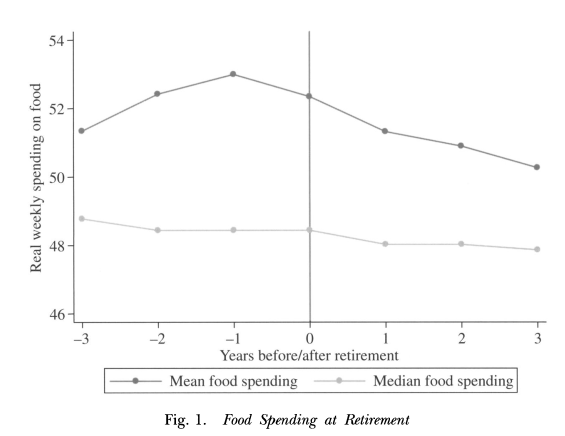

Con base en lo señalado anteriormente, formulamos la siguiente hipótesis: "El consumo del hogar se ve disminuido considerablemente con la jubilación del jefe de hogar debido a la reducción en los ingresos disponibles

Fuentes:

[1] Li, H., Shi, X., & Wu, B. (2015). The Retirement Consumption Puzzle in China. The American Economic Review, 105(5), 437–441. http://www.jstor.org/stable/43821923

[2] Smith, S. (2006). The Retirement-Consumption Puzzle and Involuntary Early Retirement: Evidence from the British Household Panel Survey. The Economic Journal, 116(510), C130–C148. http://www.jstor.org/stable/3590417

## 2. Construcción de bases de datos colapsada

Creamos la variable de elegibilidad, 1 si cumple la edad minima, 0 en caso contrario

In [66]:
# Crear variable de elegibilidad
data_base_vird_dta <- data_base_vird_dta %>%
  mutate(
    eligm = ifelse(esse_m >= 0, 1, 0)  # 1 si cumple la edad mínima, 0 en caso contrario
  )




In [67]:
head(data_base_vird_dta)

nquest,anno,lnc,c,lncn,cn,lnjconsal,jconsal,y,y_real,⋯,decoded_elig_f,decoded_educ_m,decoded_educ_f,decoded_godabit,decoded_job_m,decoded_job_f,decoded_lret_m,decoded_lret_f,decoded_left,eligm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
25,1993,9.937795,20698.04,9.937795,20698.04,6.337746,565.5203,38066.96,41683.32,⋯,non eligible,vocational studies,vocational studies,owner,publ empl,publ empl,,,kept,0
25,1995,10.347980,31194.00,10.166983,26029.43,6.834778,929.6224,47497.71,47497.71,⋯,non eligible,upper secondary,upper secondary,owner,publ empl,publ empl,,,kept,0
34,1993,10.432091,33931.22,10.432091,33931.22,6.743211,848.2805,57677.22,63156.55,⋯,eligible,college or higher,upper secondary,owner,,publ empl,publ empl,,kept,1
34,1995,10.891383,53711.52,10.677809,43382.38,6.652457,774.6853,62045.74,62045.75,⋯,eligible,college or higher,college or higher,owner,,publ empl,publ empl,,kept,1
34,1998,11.315439,82079.15,11.184411,71999.26,7.426539,1679.9826,79761.60,74130.43,⋯,eligible,college or higher,college or higher,owner,SE,publ empl,,,kept,0
34,2000,11.015616,60816.52,10.757788,46994.58,7.519109,1842.9248,79347.92,70786.28,⋯,eligible,college or higher,college or higher,owner,publ empl,publ empl,,,kept,1


Agrupamos los datos por año y ese_m y se realiza calculo de promedios de las variables clave.

En esta parte tomamos en cuenta el incorporar las siguientes 4 variables:
* job_m (Situación laboral del jefe de hogar): Esta variable se considera ya que el tipo de empleo previo, puede tener que ver con algún patrón de comportamiento.
* educ_m (Nivel de educación del jefe de hogar): El nivel de educación está altamente relacionado con ingresos, patrones de consumo o de administración de dinero, por lo que puede influir en el comportamiento de las personas a la hora de jubilarse.
* pop (Tamaño de la población local): Esta variable toma en cuenta la población local, ya que puede hacer referencia a hogares en zonas más urbanas y hogares en zonas más rurales, tomando en cuenta esto y que en las zonas rurales, se podŕia esperar que su consumo no dependa tanto de los ingresos dado el consumo loca y propio, puede ser interesante de analizar.
* pf (Deudas): Esta variable la tomamos en cuenta ya que tal vez el comportamiento posterior a lajubilación puede estar determinado por la gestión previa de recursos y que impactan en la presencia de deudas.

In [68]:
# Actualizar la base colapsada sin duplicar elegibilidad
base_agrupada_vird_dta <- data_base_vird_dta %>%
  group_by(anno, esse_m) %>%  # Agrupar por año y "esse_m"
  summarise(
    lnc_mean = mean(lnc, na.rm = TRUE),            # Promedio de lnc
    lncn_mean = mean(lncn, na.rm = TRUE),          # Promedio de lncn
    lnconsal_mean = mean(lnjconsal, na.rm = TRUE), # Promedio de lnconsal
    porcentajeretirados = mean(qu_m, na.rm = TRUE), # Promedio de qum
    elig_m_mean = mean(elig_m, na.rm = TRUE),      # Promedio de elegibilidad
    job_m_mean = mean(job_m, na.rm = TRUE),        # Promedio de job_m
    educ_m_mean = mean(educ_m, na.rm = TRUE),      # Promedio de educ_m
    pop_mean = mean(pop, na.rm = TRUE),            # Promedio de pop
    pf_mean = mean(pf, na.rm = TRUE),      # Promedio de region
    n = n()                                        # Número de observaciones por grupo
  ) #%>%
  # filter(esse_m >= -10 & esse_m <= 10)  # Filtrar rango de "esse_m"


`summarise()` has grouped output by 'anno'. You can override using the
`.groups` argument.


In [69]:
summary(base_agrupada_vird_dta)

      anno          esse_m           lnc_mean        lncn_mean     
 Min.   :1993   Min.   :-39.000   Min.   : 8.301   Min.   : 8.301  
 1st Qu.:1995   1st Qu.:-16.000   1st Qu.: 9.614   1st Qu.: 9.556  
 Median :2000   Median :  6.000   Median : 9.701   Median : 9.635  
 Mean   :1999   Mean   :  5.662   Mean   : 9.687   Mean   : 9.620  
 3rd Qu.:2002   3rd Qu.: 27.000   3rd Qu.: 9.795   3rd Qu.: 9.727  
 Max.   :2004   Max.   : 49.000   Max.   :10.327   Max.   :10.187  
                                                                   
 lnconsal_mean   porcentajeretirados  elig_m_mean       job_m_mean   
 Min.   :4.861   Min.   :0.0000      Min.   :0.0000   Min.   :1.000  
 1st Qu.:5.866   1st Qu.:0.0000      1st Qu.:0.0000   1st Qu.:1.704  
 Median :5.994   Median :0.6708      Median :1.0000   Median :1.866  
 Mean   :5.972   Mean   :0.5154      Mean   :0.5596   Mean   :1.876  
 3rd Qu.:6.108   3rd Qu.:1.0000      3rd Qu.:1.0000   3rd Qu.:2.000  
 Max.   :7.203   Max.   :1.0000     

Filtramos para incluir solo los hogares en el rango de interes

In [70]:
# Filtrar para incluir solo hogares en el rango de interés
base_colapsada_vird_dta <- base_agrupada_vird_dta %>%
  filter(esse_m >= -10 & esse_m <= 10)




In [71]:
head(base_colapsada_vird_dta)

anno,esse_m,lnc_mean,lncn_mean,lnconsal_mean,porcentajeretirados,elig_m_mean,job_m_mean,educ_m_mean,pop_mean,pf_mean,n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1993,-10,9.818808,9.758461,6.270775,0.04444444,0,1.441860,3.088889,0.06666667,3064.617,45
1993,-9,9.724754,9.688652,6.245466,0.04081633,0,1.425532,3.040816,0.16326531,5257.377,49
1993,-8,9.898612,9.811594,6.302601,0.00000000,0,1.666667,3.041667,0.16666667,1757.826,24
1993,-7,9.849893,9.792070,6.265036,0.01470588,0,1.686567,2.852941,0.10294118,2149.784,68
1993,-6,9.795966,9.735604,6.165906,0.09523810,0,1.842105,2.714286,0.09523810,1696.561,21
1993,-5,9.964823,9.921431,6.368767,0.08823529,0,1.451613,3.088235,0.00000000,2112.385,34


In [72]:
summary(base_colapsada_vird_dta)

      anno          esse_m       lnc_mean       lncn_mean     lnconsal_mean  
 Min.   :1993   Min.   :-10   Min.   :9.523   Min.   :9.467   Min.   :5.893  
 1st Qu.:1995   1st Qu.: -5   1st Qu.:9.727   1st Qu.:9.667   1st Qu.:6.023  
 Median :1999   Median :  0   Median :9.795   Median :9.723   Median :6.108  
 Mean   :1999   Mean   :  0   Mean   :9.795   Mean   :9.727   Mean   :6.101  
 3rd Qu.:2002   3rd Qu.:  5   3rd Qu.:9.860   3rd Qu.:9.797   3rd Qu.:6.171  
 Max.   :2004   Max.   : 10   Max.   :9.995   Max.   :9.921   Max.   :6.369  
 porcentajeretirados  elig_m_mean       job_m_mean     educ_m_mean   
 Min.   :0.00000     Min.   :0.0000   Min.   :1.250   Min.   :2.390  
 1st Qu.:0.05884     1st Qu.:0.0000   1st Qu.:1.681   1st Qu.:2.900  
 Median :0.33514     Median :0.0000   Median :1.873   Median :3.094  
 Mean   :0.40061     Mean   :0.4762   Mean   :1.902   Mean   :3.149  
 3rd Qu.:0.70147     3rd Qu.:1.0000   3rd Qu.:2.079   3rd Qu.:3.322  
 Max.   :0.98611     Max.   :1.000

El proceso de construcción de la base contempló:

* Agrupación: Los datos se agruparon por las variables anno y esse_m
* Cálculo de promedios: Se calcularion los promedios de las variables relevantes y el promedio de qum para construir la variable *porcentajeretirados*
* Filtrado: Se inluyeron solamente las combinaciones de esse_m en el rango [-10,10].

Respecto de la unidad de análisis de la base colpasada, corresponde a la combinación única de año y diferencia en años respecto de la edad mínima de jubilación, por lo que se toman en cuenta los hogares que cumplen con pertenecer a un año específico y tener al jefe de hogar con igual diferencia de edad respecto de su jubilación.


# Parte 2: Diseño de Regresión Discontinua

En esta parte vamos a verificar si se cumplen los supuestos de Sharp y RD:

* Asignación exacta del tratamiento: La elegibilidad del tratamiento (eligm)depende únicamente de si la variable continua (esse_m) cruza un umbral conocido (esse_m = 0)
* No manipulación del umbral: Los individuos no deben tener control sobre la variable continua (esse_m) para ubicarse por encima o debajo del umbral.
* Continuidad den las covariables: Las variables no relacionadas con el tratamiento deben ser continuas alrededor del umbral. Esto garantiza que las discontinuidades observadas en la variable dependiente sean atribuibles al tratamiento
* Continuidad del resultado en ausencia de tratamiento: Si no hay tratamiento, la relación entra la variable continua (esse_m) y la variable dependente (lnc) deberia ser suave y continua alrededor del umbral
* Discontinuidad en la probabilidad del tratamiento: La probabilidad de recibir el tratamiento debe cambiar apruptamente en el umbral. En un diseño Sharp RD, este cambio es de 0 a 100.

## Discontinuidad en la variable dependiente *lnc*

`geom_smooth()` using formula = 'y ~ x'


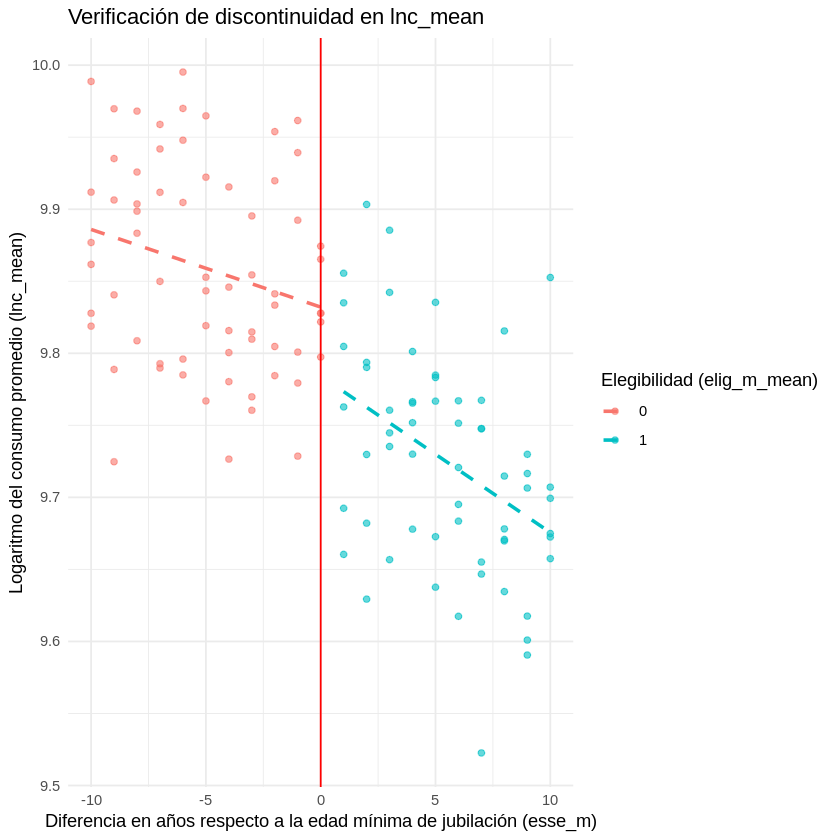

In [75]:
# Gráfico para verificar discontinuidad en lnc_mean
ggplot(base_colapsada_vird_dta, aes(x = esse_m, y = lnc_mean, color = as.factor(elig_m_mean))) +
  geom_point(alpha = 0.6) +                              # Puntos de datos
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + # Regresión lineal separada
  geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Umbral en esse_m = 0
  labs(
    title = "Verificación de discontinuidad en lnc_mean",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Logaritmo del consumo promedio (lnc_mean)",
    color = "Elegibilidad (elig_m_mean)"
  ) +
  theme_minimal()



Hay una clara dicontinuidad en el umbral, la caída es clara cuando se pasa de valores negativos a posiivos y sugiere que la jubilación tiene un impacto negativo en el consumo promedio

## Continuidad de las covariables

`geom_smooth()` using formula = 'y ~ x'


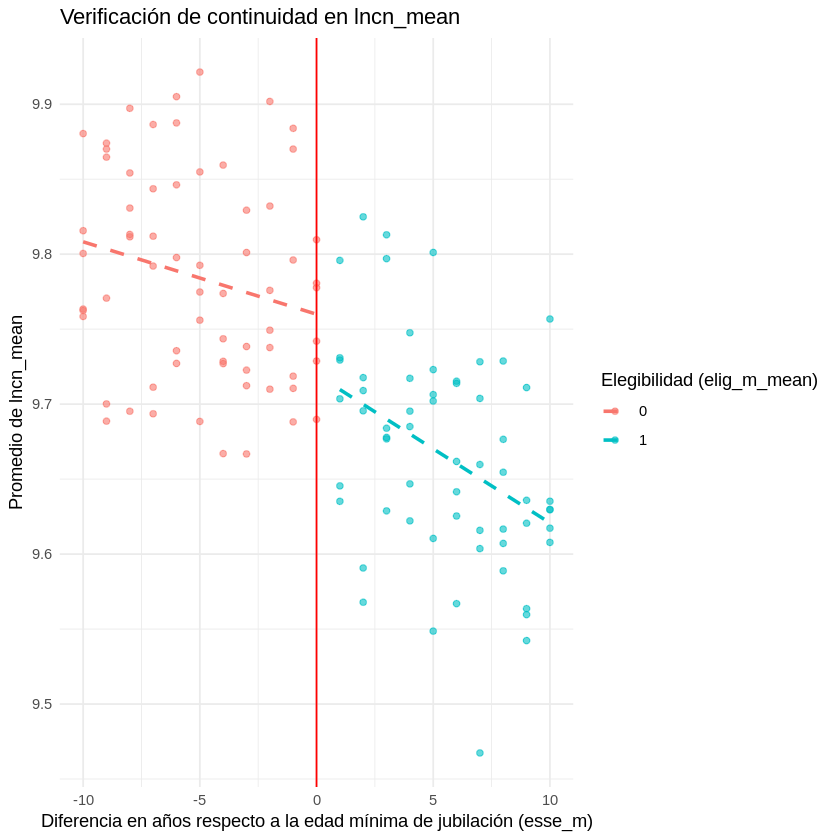

In [78]:
# Gráfico para lncn_mean
ggplot(base_colapsada_vird_dta, aes(x = esse_m, y = lncn_mean, color = as.factor(elig_m_mean))) +
  geom_point(alpha = 0.6) +                              # Puntos de datos
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + # Regresión lineal separada
  geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Umbral en esse_m = 0
  labs(
    title = "Verificación de continuidad en lncn_mean",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Promedio de lncn_mean",
    color = "Elegibilidad (elig_m_mean)"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


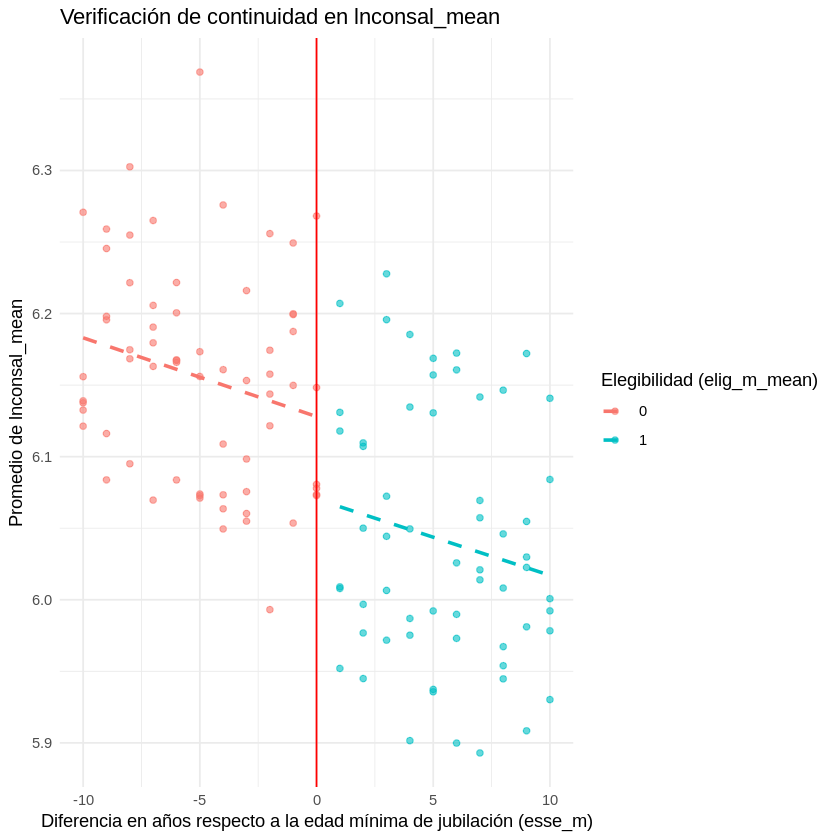

In [79]:
# Gráfico para lnconsal_mean
ggplot(base_colapsada_vird_dta, aes(x = esse_m, y = lnconsal_mean, color = as.factor(elig_m_mean))) +
  geom_point(alpha = 0.6) +                              # Puntos de datos
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + # Regresión lineal separada
  geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Umbral en esse_m = 0
  labs(
    title = "Verificación de continuidad en lnconsal_mean",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Promedio de lnconsal_mean",
    color = "Elegibilidad (elig_m_mean)"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


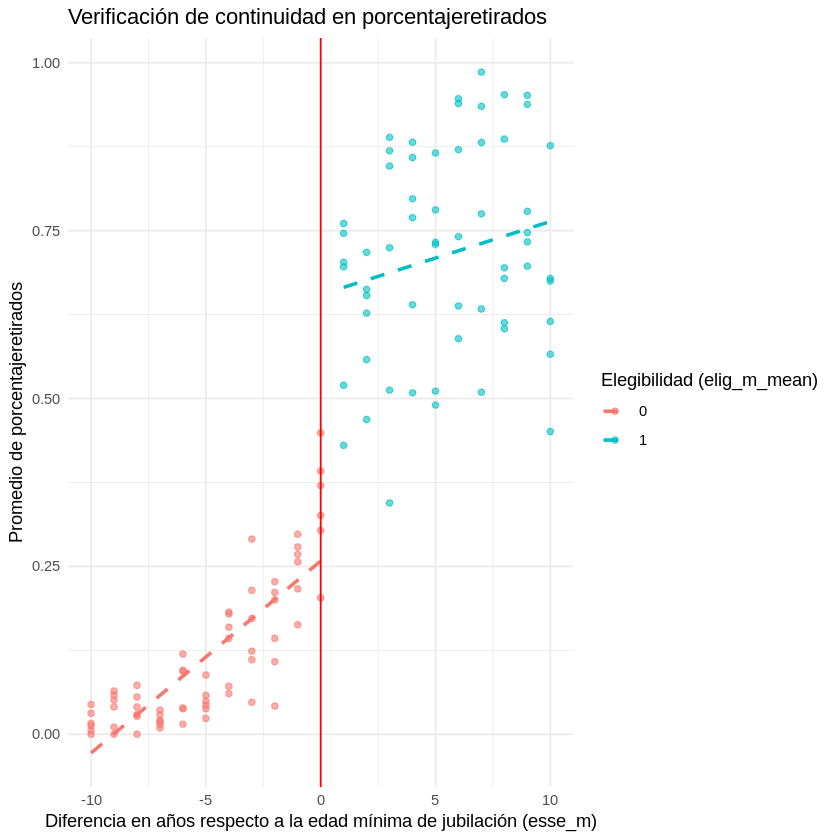

In [80]:
# Gráfico para porcentajeretirados
ggplot(base_colapsada_vird_dta, aes(x = esse_m, y = porcentajeretirados, color = as.factor(elig_m_mean))) +
  geom_point(alpha = 0.6) +                              # Puntos de datos
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + # Regresión lineal separada
  geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Umbral en esse_m = 0
  labs(
    title = "Verificación de continuidad en porcentajeretirados",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Promedio de porcentajeretirados",
    color = "Elegibilidad (elig_m_mean)"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


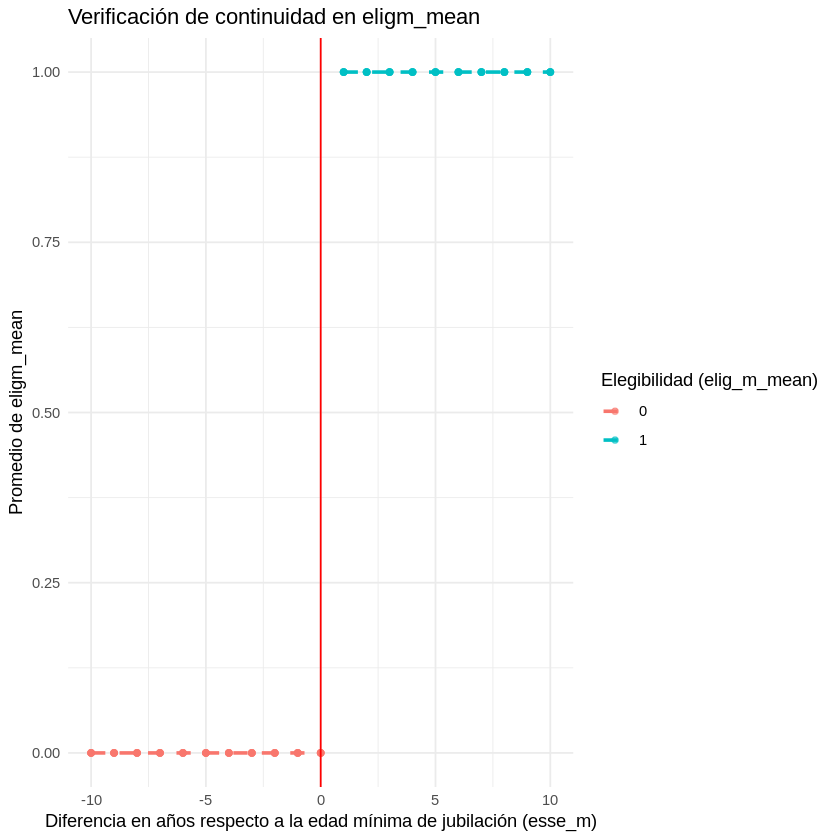

In [81]:
# Gráfico para eligm_mean
ggplot(base_colapsada_vird_dta, aes(x = esse_m, y = elig_m_mean, color = as.factor(elig_m_mean))) +
  geom_point(alpha = 0.6) +                              # Puntos de datos
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + # Regresión lineal separada
  geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Umbral en esse_m = 0
  labs(
    title = "Verificación de continuidad en eligm_mean",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Promedio de eligm_mean",
    color = "Elegibilidad (elig_m_mean)"
  ) +
  theme_minimal()


En los gráficos anteriores se observa que para las variables relacionadas con el consumo (lncn_mean y lnconsal_mean) se aprecia una discontinuidad clara en el umbral, en el caso de lncn_mean da a entender que el consumo no relacionado con el ingreso salarial disminuye significativamente con la jubilación, por su parte, en el caso de lnconsal_mean confirma que la jubilación tiene un impacto directo en esta categoría.

La variables procentajeretirados tiene un salto mucho más abrupto señalando que el tratamiento tiene el efecto esperado en la probabilidad de que los jefes de hogar se retiren y por su parte la variable de tratamiento (*elig_m_mean*) cambia perfectamente lapasar por el umbral, como se esperaría en un diseño sharp RD.

Se seleccionaron estas 4 variables para analizar porque son las que tienen una relación directa con el consumo del hogar y la implementación del tratamiento. Las otras variables (agregadas por nosotros) no están incorporadas o porque

### Densidad de la running variable (esse_m)

In [ ]:
# Gráfico de densidad para verificar manipulación en esse_m
ggplot(base_colapsada_vird_dta, aes(x = esse_m)) +
  geom_density(fill = "blue", alpha = 0.4) +
  geom_vline(xintercept = 0, linetype = "solid", color = "red") +
  labs(
    title = "Verificación de densidad en esse_m",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Densidad"
  ) +
  theme_minimal()


Se observa una densidad continua y uniforme a través del umbral en *esse_m* = 0, lo que siguiere que no hay evidencia de manipulación de esta variable.